In [11]:
# 0. Setup & Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Display settings
pd.set_option("display.max_columns", None)


In [13]:
# 1. Load Data

data_path = "C:/Users/sarth/Desktop/PYTHON/Project 1 - Housing EDA/data/ZHVI.csv"

df = pd.read_csv(data_path)
print("Raw columns:", df.columns.tolist()[:10], "...")

# Rename first column to 'Date' if it's unnamed
df = df.rename(columns={df.columns[0]: "Date"})

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date just in case
df = df.sort_values("Date").reset_index(drop=True)

df.head()

Raw columns: ['Unnamed: 0', 'Florida', 'California', 'Texas', 'Pennsylvania', 'Virginia', 'New York', 'the District of Columbia', 'Arizona', 'Colorado'] ...


,Date,Florida,California,Texas,Pennsylvania,Virginia,New York,the District of Columbia,Arizona,Colorado,Massachusetts,Washington,Illinois,New Jersey,Michigan,Utah,Hawaii,Tennessee,Nevada,Connecticut,Mississippi,Oregon,Minnesota,Georgia,West Virginia,South Carolina,Maine,Maryland,North Carolina,Wyoming,Iowa,New Hampshire,Ohio,Idaho,Alabama,Montana,Nebraska,North Dakota,Indiana,Missouri,Louisiana,Alaska,Vermont,Rhode Island,Arkansas,Delaware,Kansas,Wisconsin,New Mexico,Oklahoma,Kentucky,South Dakota
0,2000-01-01,"108,211.25","189,126.97","113,202.00","100,412.66","125,062.40","155,461.56","163,042.07","136,505.49","178,255.25","198,818.42","176,375.45","130,406.97","172,330.41","118,843.03","170,295.80","195,051.00","113,534.10","155,167.01","164,376.92","90,008.43","152,391.80","126,448.55","127,008.55","73,371.58","115,603.71","109,270.08","152,493.91","129,757.85",NaN,"92,061.09","135,209.25","106,251.71","125,216.62","100,871.16",NaN,"116,930.84",NaN,"98,866.56","98,201.92","110,465.60","136,804.31","119,403.36","132,899.17","90,356.60","148,547.13","89,988.15","123,852.45",NaN,"84,164.57","88,619.04","109,508.23"
1,2000-02-01,"108,445.65","189,762.68","113,263.52","100,627.43","125,386.01","156,015.16","163,575.34","136,752.74","178,888.19","199,482.21","176,773.29","130,511.48","172,794.95","118,908.49","170,389.10","194,960.76","113,628.82","155,186.40","165,003.15","89,959.07","152,726.93","126,874.18","127,296.96","73,368.44","115,858.91","109,633.62","152,472.76","129,955.26",NaN,"92,237.01","135,668.57","106,316.63","125,140.71","101,046.81",NaN,"117,117.76",NaN,"98,730.62","98,317.02","110,678.68","136,959.69","119,603.30","133,503.59","90,477.35","148,778.23","90,005.81","123,816.50",NaN,"84,199.29","88,664.79","109,275.56"
2,2000-03-01,"108,729.78","190,621.05","113,293.35","100,829.26","125,729.12","156,548.09","164,332.00","137,070.96","179,587.65","200,272.01","177,179.12","130,737.38","173,238.21","119,148.13","170,535.58","195,260.12","113,725.41","155,426.56","165,657.04","89,956.92","153,033.09","127,270.18","127,629.74","73,392.16","116,066.87","109,958.22","152,580.80","130,158.59",NaN,"92,403.09","136,216.90","106,415.10","125,188.80","101,164.50",NaN,"117,291.00",NaN,"98,577.94","98,489.34","110,844.26","137,114.99","119,917.30","134,138.32","90,614.36","149,065.98","90,109.88","123,955.06",NaN,"84,361.12","88,748.04","108,949.96"
3,2000-04-01,"109,307.36","192,484.30","113,441.44","101,240.56","126,377.48","157,694.26","165,954.45","137,720.74","181,151.61","201,827.59","177,998.19","131,268.81","174,220.26","119,625.49","170,903.11","195,779.42","113,957.81","155,976.92","166,764.86","90,021.81","153,675.55","128,199.75","128,330.40","73,452.19","116,543.57","110,673.33","152,841.52","130,599.64",NaN,"92,761.82","137,040.01","106,704.66","125,288.66","101,428.16",NaN,"117,559.92",NaN,"98,113.81","98,883.23","111,217.55","137,297.12","120,534.28","135,392.45","90,906.90","149,724.05","90,265.46","124,154.04",NaN,"84,655.81","88,954.91","108,511.08"
4,2000-05-01,"109,930.21","194,650.06","113,537.34","101,663.07","127,003.40","158,880.15","167,755.05","138,457.28","182,897.27","203,511.43","178,892.15","131,899.37","175,221.37","120,329.45","172,235.07","196,796.68","114,225.89","156,678.23","167,675.20","90,337.58","154,248.48","129,219.49","129,103.19","73,569.30","116,988.65","111,346.96","153,387.11","131,091.00",NaN,"93,158.16","137,940.96","107,146.15","125,614.27","101,722.24",NaN,"117,696.29",NaN,"97,889.55","99,392.03","111,613.04","137,571.30","121,244.80","136,642.14","91,195.43","150,474.61","90,499.99","124,551.03",NaN,"85,051.62","89,229.86","108,328.49"


In [14]:
# 2. Identify State Columns
state_cols = df.columns[1:]  # everything except Date
print("Number of states:", len(state_cols))
print("Example states:", state_cols[:10].tolist())

Number of states: 51
Example states: ['Florida', 'California', 'Texas', 'Pennsylvania', 'Virginia', 'New York', 'the District of Columbia', 'Arizona', 'Colorado', 'Massachusetts']


In [15]:
# 3. Basic Exploration

print("\n=== Info ===")
df.info()

print("\n=== Describe (numeric) ===")
display(df.describe())

print("\n=== Missing values per column (top 20) ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(20)

# % of missing values
# missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
# missing_pct[missing_pct > 0].head(20)


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      309 non-null    datetime64[ns]
 1   Florida                   309 non-null    float64       
 2   California                309 non-null    float64       
 3   Texas                     309 non-null    float64       
 4   Pennsylvania              309 non-null    float64       
 5   Virginia                  309 non-null    float64       
 6   New York                  309 non-null    float64       
 7   the District of Columbia  309 non-null    float64       
 8   Arizona                   308 non-null    float64       
 9   Colorado                  309 non-null    float64       
 10  Massachusetts             309 non-null    float64       
 11  Washington                309 non-null    float64       
 12  Illinois

,Date,Florida,California,Texas,Pennsylvania,Virginia,New York,the District of Columbia,Arizona,Colorado,Massachusetts,Washington,Illinois,New Jersey,Michigan,Utah,Hawaii,Tennessee,Nevada,Connecticut,Mississippi,Oregon,Minnesota,Georgia,West Virginia,South Carolina,Maine,Maryland,North Carolina,Wyoming,Iowa,New Hampshire,Ohio,Idaho,Alabama,Montana,Nebraska,North Dakota,Indiana,Missouri,Louisiana,Alaska,Vermont,Rhode Island,Arkansas,Delaware,Kansas,Wisconsin,New Mexico,Oklahoma,Kentucky,South Dakota
count,309,309.00,309.00,309.00,309.00,309.00,309.00,309.00,308.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,308.00,309.00,309.00,309.00,309.00,282.00,309.00,309.00,309.00,308.00,309.00,248.00,309.00,201.00,309.00,309.00,309.00,308.00,309.00,309.00,309.00,309.00,309.00,309.00,282.00,309.00,309.00,308.00
mean,2012-10-31 01:33:12.233009664,"216,646.69","445,757.45","178,640.47","175,134.59","251,965.49","302,089.55","435,627.74","243,730.53","314,971.60","384,410.59","332,644.05","190,196.34","338,047.06","153,578.37","281,628.05","502,188.17","179,822.67","260,625.19","272,769.68","131,185.32","290,575.03","219,331.08","187,784.91","111,076.21","178,110.91","223,650.34","291,501.01","191,038.11","227,809.10","141,587.24","269,140.08","142,471.78","236,420.13","147,917.30","260,037.24","158,582.79","221,408.80","141,035.45","154,012.21","169,519.22","262,883.93","244,989.45","277,216.95","139,166.08","257,654.04","139,243.54","192,378.21","196,343.52","129,959.64","131,629.80","180,104.54"
min,2000-01-01 00:00:00,"108,211.25","189,126.97","113,202.00","100,412.66","125,062.40","155,461.56","163,042.07","136,505.49","178,255.25","198,818.42","176,375.45","130,406.97","172,330.41","95,440.01","170,295.80","194,960.76","113,534.10","128,961.12","164,376.92","89,956.92","152,391.80","126,448.55","121,011.25","73,368.44","115,603.71","109,270.08","152,472.76","129,757.85","140,354.93","92,061.09","135,209.25","106,251.71","125,140.71","100,871.16","161,227.44","109,812.12","165,669.02","97,889.55","98,201.92","110,465.60","136,804.31","119,403.36","132,899.17","90,356.60","148,547.13","89,988.15","123,816.50","134,465.57","84,164.57","88,619.04","107,955.83"
25%,2006-06-01 00:00:00,"147,907.97","305,911.64","135,537.17","156,170.27","218,355.15","258,704.24","362,983.52","163,729.55","225,988.23","311,335.39","234,373.83","161,621.86","286,493.30","123,785.37","189,469.81","412,476.60","137,452.06","174,455.67","240,253.33","114,604.93","204,646.50","176,703.26","144,434.80","99,839.13","142,365.57","181,708.80","249,525.29","150,553.22","195,918.69","119,050.48","215,439.77","118,105.52","150,598.70","121,879.68","188,407.89","128,022.37","192,752.43","113,259.05","126,868.95","156,593.94","229,017.71","214,884.72","224,083.88","119,376.52","218,992.73","115,822.52","157,481.60","166,010.26","108,599.30","109,376.19","140,095.66"
50%,2012-11-01 00:00:00,"196,051.54","420,760.64","145,166.16","166,076.50","243,895.22","280,884.14","398,358.25","217,068.36","241,620.23","353,386.23","289,562.83","184,225.12","320,190.43","142,778.37","229,488.97","475,545.65","149,571.78","235,878.80","258,246.88","123,040.68","256,436.09","203,810.71","162,971.49","104,062.83","158,457.51","199,348.72","284,673.63","164,981.91","209,928.70","124,344.59","242,070.82","128,125.31","191,618.78","135,641.97","214,827.72","134,803.83","228,164.45","120,185.58","138,875.82","165,783.12","257,984.88","228,400.30","258,958.23","127,837.27","249,951.71","121,981.92","175,081.25","179,774.22","114,498.91","114,438.48","157,549.82"
75%,2019-04-01 00:00:00,"253,745.54","537,864.38","212,278.25","188,677.74","274,021.06","347,001.21","575,474.27","281,541.40","394,634.34","429,661.57","396,036.47","210,652.16","370,478.13","170,771.36","335,576.31","611,623.26","201,975.93","326,774.81","306,196.44","142,783.36","358,886.08","252,182.24","205,412.69","118,360.13","191,778.98","237,501.01","336,277.04","204,45


=== Missing values per column (top 20) ===


North Dakota     108
Montana           61
Wyoming           27
New Mexico        27
South Dakota       1
West Virginia      1
Arizona            1
Idaho              1
Alaska             1
dtype: int64

In [16]:
# 4. Handle Missing Values (basic approach)

df_clean = df.copy()

# Example numeric columns: fill with median
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Example categorical columns: fill with mode
cat_cols = df_clean.select_dtypes(include=["object"]).columns

for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("Remaining missing values:", df_clean.isnull().sum().sum())

Remaining missing values: 0


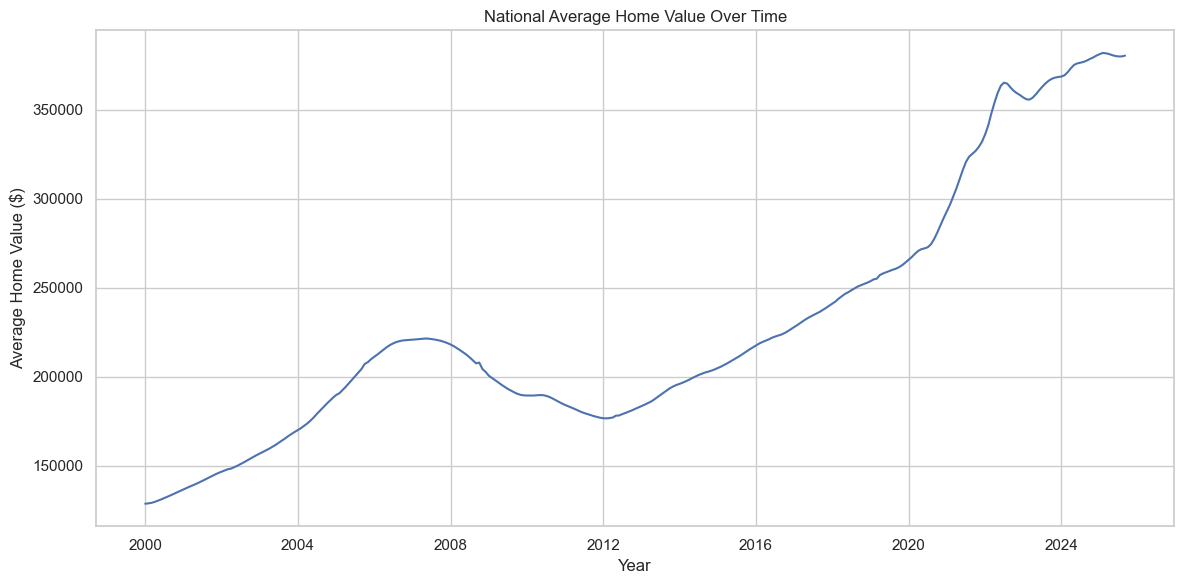

In [17]:
# 5. Average home value across states at each month
df["US_Avg_Home_Value"] = df[state_cols].mean(axis=1)

plt.plot(df["Date"], df["US_Avg_Home_Value"])
plt.title("National Average Home Value Over Time")
plt.xlabel("Year")
plt.ylabel("Average Home Value ($)")
plt.tight_layout()
plt.savefig("../images/national_avg_trend.png", dpi=140)
plt.show()


Latest date in dataset: 2025-09-01


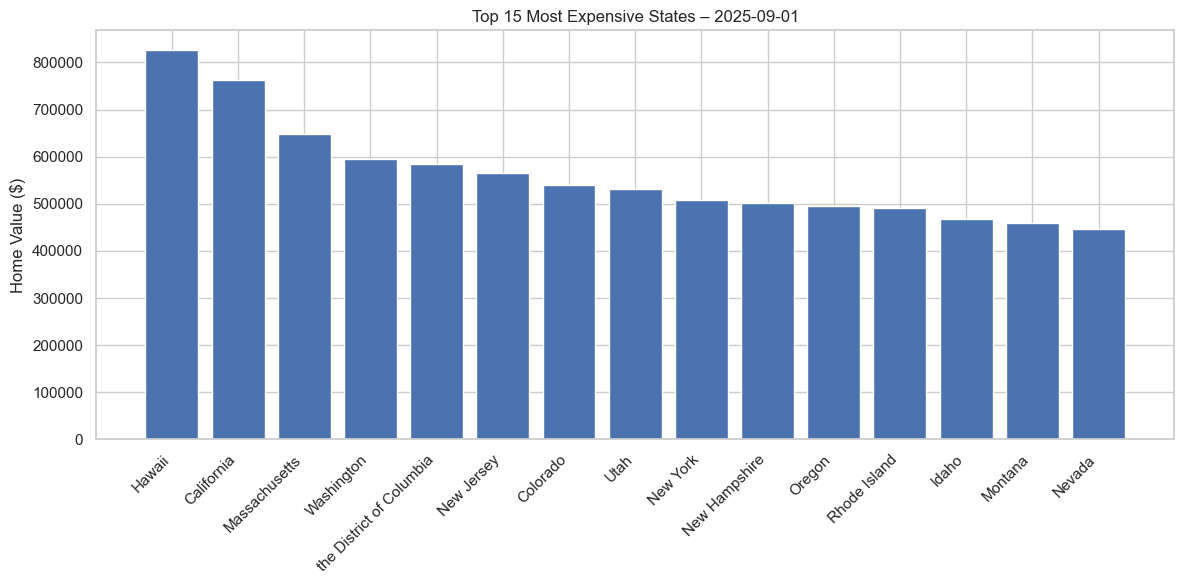

Hawaii                     826,574.99
California                 763,287.57
Massachusetts              649,115.73
Washington                 595,737.80
the District of Columbia   583,446.72
New Jersey                 564,432.42
Colorado                   540,183.16
Utah                       530,804.13
New York                   508,764.03
New Hampshire              501,649.51
Oregon                     496,180.50
Rhode Island               490,356.22
Idaho                      468,436.45
Montana                    460,050.62
Nevada                     445,669.24
Name: 308, dtype: object

In [18]:
# 6. Latest date and values for each state
latest_row = df.iloc[-1]
latest_date = latest_row["Date"]
latest_values = latest_row[state_cols]

print("Latest date in dataset:", latest_date.date())

top_states_latest = latest_values.sort_values(ascending=False).head(15)

plt.bar(top_states_latest.index, top_states_latest.values)
plt.title(f"Top 15 Most Expensive States – {latest_date.date()}")
plt.ylabel("Home Value ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../images/top_states_latest.png", dpi=140)
plt.show()

top_states_latest


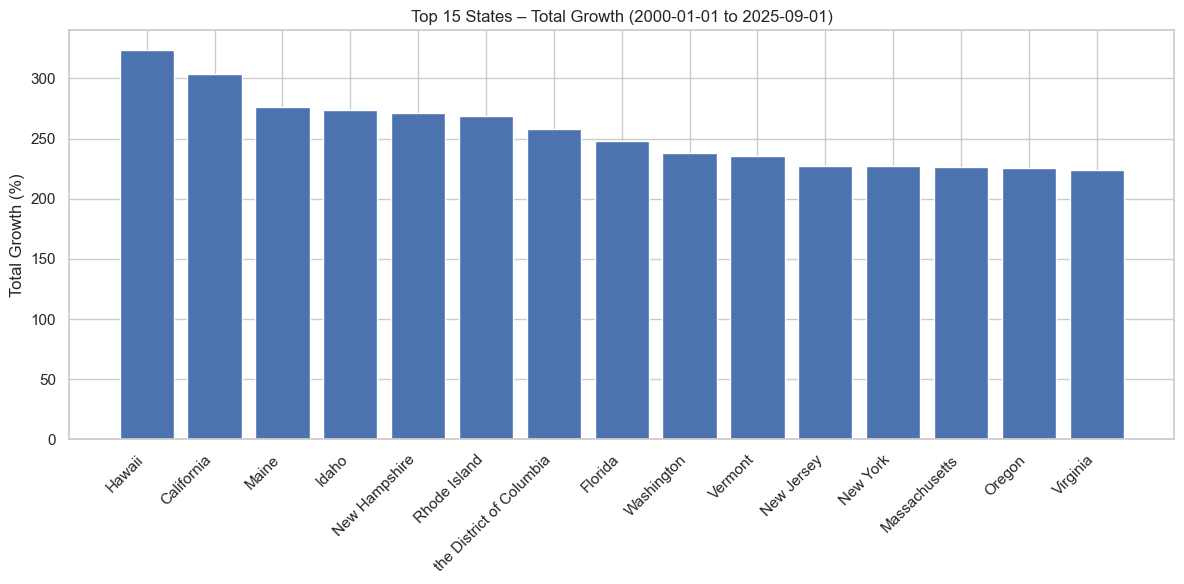

Hawaii                     323.77
California                 303.58
Maine                      276.06
Idaho                      274.10
New Hampshire              271.02
Rhode Island               268.97
the District of Columbia   257.85
Florida                    248.45
Washington                 237.77
Vermont                    235.21
New Jersey                 227.53
New York                   227.26
Massachusetts              226.49
Oregon                     225.60
Virginia                   223.81
dtype: object

In [19]:
# 7. Long-Term Growth (First vs Latest)

first_row = df.iloc[0]
first_date = first_row["Date"]
first_values = first_row[state_cols]

long_term_growth_pct = (latest_values - first_values) / first_values * 100

top_growth_long_term = long_term_growth_pct.sort_values(ascending=False).head(15)

plt.bar(top_growth_long_term.index, top_growth_long_term.values)
plt.title(f"Top 15 States – Total Growth ({first_date.date()} to {latest_date.date()})")
plt.ylabel("Total Growth (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../images/top_states_long_term_growth.png", dpi=140)
plt.show()

top_growth_long_term


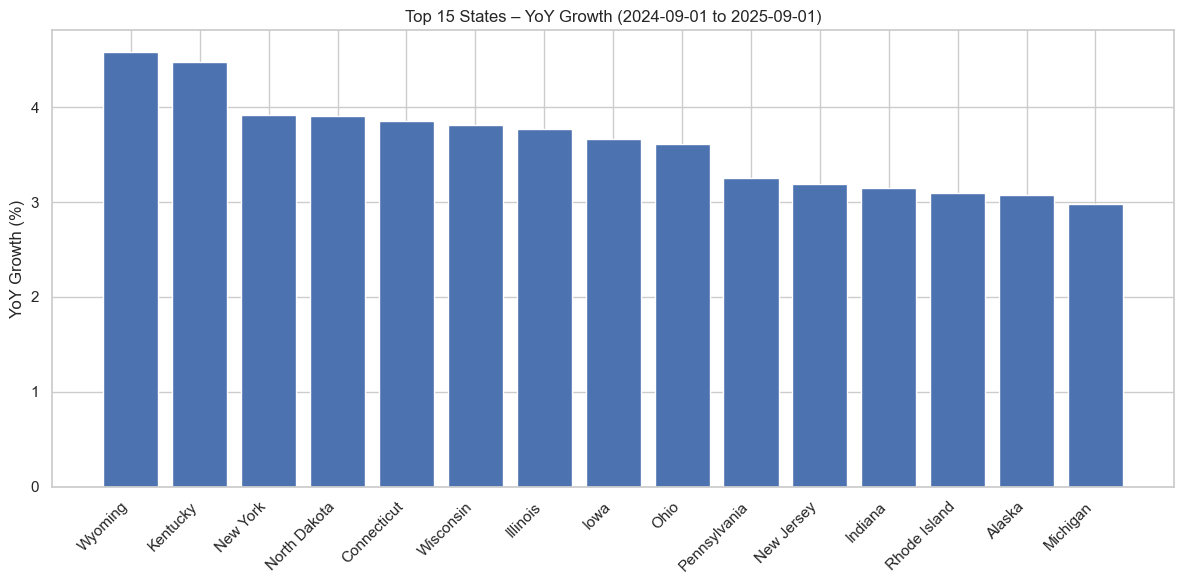

Wyoming        4.58
Kentucky       4.48
New York       3.92
North Dakota   3.91
Connecticut    3.86
Wisconsin      3.82
Illinois       3.77
Iowa           3.67
Ohio           3.62
Pennsylvania   3.26
New Jersey     3.19
Indiana        3.15
Rhode Island   3.10
Alaska         3.08
Michigan       2.98
dtype: object

In [22]:
# 8. Year-over-Year (YoY) Growth

if len(df) > 13:
    latest_values = df.iloc[-1][state_cols]
    prev_year_values = df.iloc[-13][state_cols]
    yoy_growth_pct = (latest_values - prev_year_values) / prev_year_values * 100

    top_yoy = yoy_growth_pct.sort_values(ascending=False).head(15)

    plt.bar(top_yoy.index, top_yoy.values)
    plt.title(f"Top 15 States – YoY Growth ({df.iloc[-13]['Date'].date()} to {latest_date.date()})")
    plt.ylabel("YoY Growth (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("../images/top_states_yoy_growth.png", dpi=140)
    plt.show()
else:
    print("Not enough data points for YoY calculation (need at least 13 months).")

top_yoy


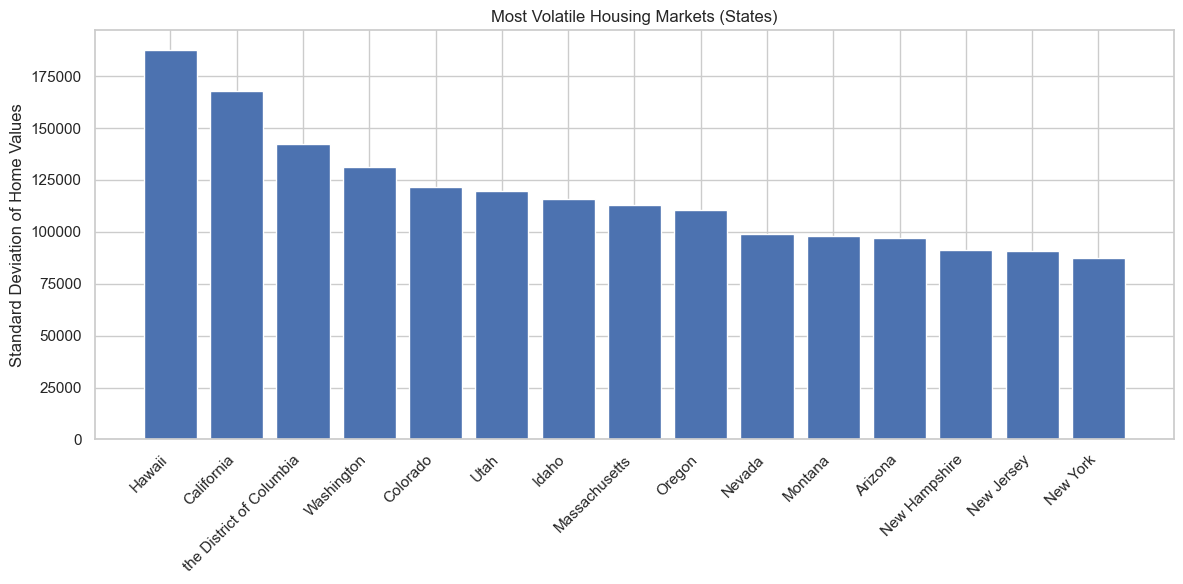

Hawaii                     187,666.18
California                 168,038.74
the District of Columbia   142,486.25
Washington                 131,122.77
Colorado                   121,602.38
Utah                       119,569.51
Idaho                      115,988.48
Massachusetts              113,069.76
Oregon                     110,760.45
Nevada                      98,771.23
Montana                     98,165.26
Arizona                     96,858.71
New Hampshire               91,206.56
New Jersey                  90,735.21
New York                    87,485.93
dtype: float64

In [23]:
# 9. Volatility (Market Stability)

state_volatility = df[state_cols].std(axis=0)

# Most volatile states
most_volatile = state_volatility.sort_values(ascending=False).head(15)

plt.bar(most_volatile.index, most_volatile.values)
plt.title("Most Volatile Housing Markets (States)")
plt.ylabel("Standard Deviation of Home Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../images/most_volatile_states.png", dpi=140)
plt.show()

most_volatile


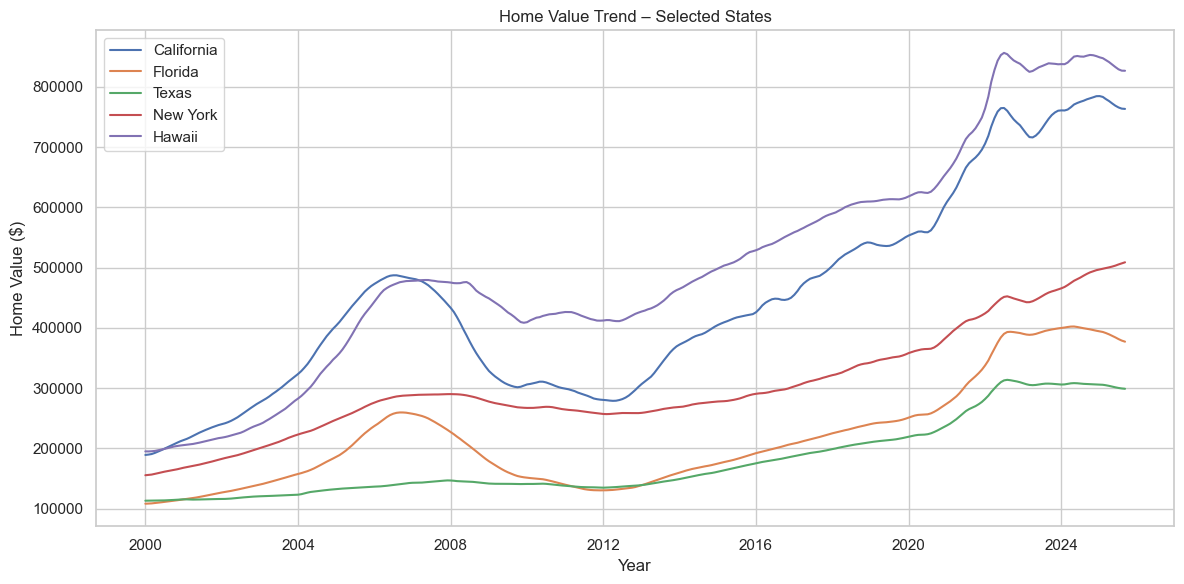

In [26]:
# 10. Sample State Time-Series (Drilldown)

sample_states = ["California", "Florida", "Texas", "New York", "Hawaii"]
sample_states = [s for s in sample_states if s in state_cols]  # keep only those that exist

for state in sample_states:
    plt.plot(df["Date"], df[state], label=state)

plt.legend()
plt.title("Home Value Trend – Selected States")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.tight_layout()
plt.savefig("../images/sample_states_trend.png", dpi=140)
plt.show()


In [27]:
# 11. Insights String (For Report)

insights = f"""
1. The national average home value has shown a clear upward trend from {first_date.date()} to {latest_date.date()},
   indicating long-term appreciation in the US housing market.

2. As of {latest_date.date()}, states like {', '.join(top_states_latest.index[:5])} rank among the most expensive,
   with home values significantly above the national average.

3. Over the full period, states such as {', '.join(top_growth_long_term.index[:5])} show the strongest total
   percentage growth in home values, highlighting them as long-term high-growth markets.

4. Recent year-over-year analysis suggests that {', '.join(top_yoy.index[:5])} have experienced the fastest
   short-term appreciation, which may indicate current hotspots for investors.

5. Volatility analysis shows that states like {', '.join(most_volatile.index[:5])} have the largest fluctuations
   in home values over time, suggesting higher risk but also potentially higher reward markets.

6. In contrast, states with lower volatility tend to have more stable, predictable price movements, which may be
   attractive for risk-averse buyers.
"""
print(insights)



1. The national average home value has shown a clear upward trend from 2000-01-01 to 2025-09-01,
   indicating long-term appreciation in the US housing market.

2. As of 2025-09-01, states like Hawaii, California, Massachusetts, Washington, the District of Columbia rank among the most expensive,
   with home values significantly above the national average.

3. Over the full period, states such as Hawaii, California, Maine, Idaho, New Hampshire show the strongest total
   percentage growth in home values, highlighting them as long-term high-growth markets.

4. Recent year-over-year analysis suggests that Wyoming, Kentucky, New York, North Dakota, Connecticut have experienced the fastest
   short-term appreciation, which may indicate current hotspots for investors.

5. Volatility analysis shows that states like Hawaii, California, the District of Columbia, Washington, Colorado have the largest fluctuations
   in home values over time, suggesting higher risk but also potentially higher r